In [1]:
#answersTable= answersTable.merge(questiondf,left_on=' ParentId',suffixes=('', 'Global'), right_on=' ParentId', how='left')
#answersTable

## COPIED

b'Skipping line 325621: expected 10 fields, saw 23\n'
b'Skipping line 336660: expected 10 fields, saw 74\nSkipping line 366638: expected 10 fields, saw 19\n'
b'Skipping line 455722: expected 10 fields, saw 11\n'
b'Skipping line 804123: expected 10 fields, saw 19\n'
b'Skipping line 865079: expected 10 fields, saw 12\nSkipping line 866131: expected 10 fields, saw 15\n'
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2856: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
b'Skipping line 1122646: expected 7 fields, saw 12\n'


0.8437442133201654 % of the users were removed.
0.8437442133201654 % of the users were removed.
0.8437442133201654 % of the users were removed.


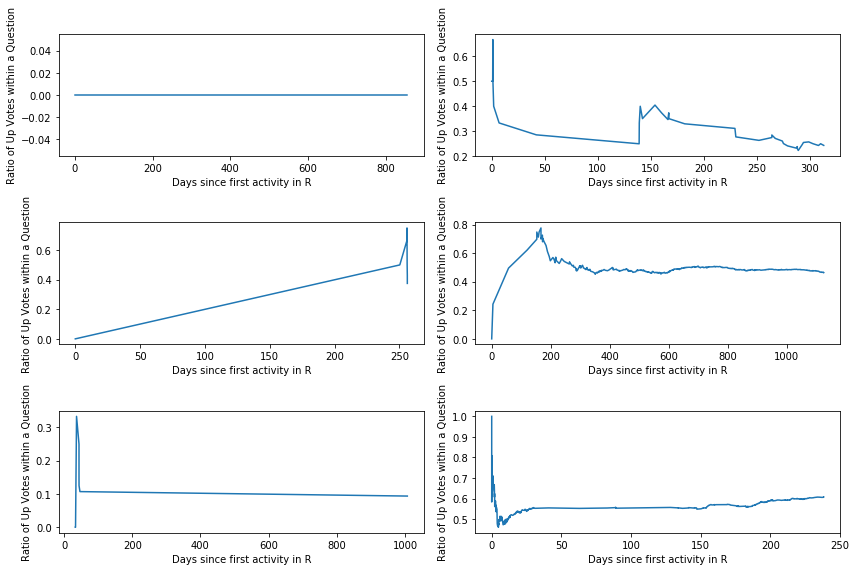

              Id   OwnerUserId            CreationDate   ParentId  UpMetric  \
1461       79741          3259 2008-09-17 03:43:22.923      79709 -0.043478   
1518       79768          6043 2008-09-17 03:48:29.900      79709  0.434783   
1608       79779          8002 2008-09-17 03:49:36.560      79709  0.000000   
0          79788             0 2008-09-17 03:51:30.190      79709  0.173913   
1685       79827         14257 2008-09-17 03:58:26.367      79709  0.043478   
1700       79893         14928 2008-09-17 04:11:08.660      79709  0.260870   
1724       83162         15842 2008-09-17 13:27:17.140      77434  0.164329   
937        83222          1428 2008-09-17 13:32:45.113      77434  0.525050   
1          86804             0 2008-09-17 19:39:37.370      79709  0.108696   
924        95598          1179 2008-09-18 18:49:09.870      95007  0.084746   
1569      102067          6833 2008-09-19 14:05:20.517     102056  0.000000   
1570      102121          6899 2008-09-19 14:11:48.9

ValueError: A value in x_new is below the interpolation range.

In [6]:
import re
import csv
import sys
import random
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


def main():
    
    # import tables for Java, python and R
    rUsers= pd.read_csv("r_users.csv")
    pythonUsers= pd.read_csv("python_users.csv")
    javaUsers=pd.read_csv("java_users.csv") 
    
    javaQuestions = pd.read_csv("java_questions.csv",sep=";",error_bad_lines=False)
    pythonQuestions= pd.read_csv("python_questions.csv",error_bad_lines=False)
    rQuestions= pd.read_csv("r_questions.csv")
    
    javaAnswers = pd.read_csv("java_answers.csv",error_bad_lines=False)
    pythonAnswers = pd.read_csv("python_answers.csv",error_bad_lines=False) 
    rAnswers= pd.read_csv("r_answers.csv")
    
    # read Barbara's metric
    rProbAcc=pd.read_csv("barbarametric.csv") 
    rProbAcc = rProbAcc.sort_values([' CreationDate'])
    
    # read Degree metric
    rDegree=pd.read_csv("lil_degree.csv") 
    rDegree = rDegree.sort_values([' CreationDate'])
    
    # read Nirmal's metric betweeness
    rBetween = pd.read_csv("lil_between.csv")
    
    rBetween = formatCreationDateColumn1(rBetween)
    rBetween = rBetween.sort_values(['CreationDate','UserId'])

    # read Nirmal's metric 2 closeness
    rClose = pd.read_csv("lil_close.csv") 
    rClose = formatCreationDateColumn1(rClose)
    rClose = rClose.sort_values(['CreationDate', 'UserId'])
    
    # read Nirmal's metric 3 eigen 
    rEig = pd.read_csv("lil_eig.csv") 
    rEig = formatCreationDateColumn1(rEig)
    rEig = rEig.sort_values(['CreationDate','UserId']) 
    
    
    # UpMetric creation for every language
    rAnswers = upMetricCreation(rAnswers)
    pythonAnswers = upMetricCreation(pythonAnswers)
    javaAnswers = upMetricCreation(javaAnswers)
    
    
    # format data column for all the tables
    rAnswers = formatCreationDateColumn(rAnswers)
    javaAnswers = formatCreationDateColumn(javaAnswers)
    pythonAnswers = formatCreationDateColumn(pythonAnswers)
    
    rQuestions = formatCreationDateColumn(rQuestions)
    javaQuestions = formatCreationDateColumn(javaQuestions)
    pythonQuestions = formatCreationDateColumn(pythonQuestions)
    
    
    # get first activity per user in all the languages
    rFirstActTable = gettingTableUserFirstActivity(rAnswers,rQuestions)
    javaFirstActTable = gettingTableUserFirstActivity(javaAnswers,javaQuestions)
    pythonFirstActTable = gettingTableUserFirstActivity(pythonAnswers,pythonQuestions)
    
    
    # obtainSummaryUpMetric per language
    rSummaryUpMetricAnswer = obtainSummaryUpMetric(rAnswers,rQuestions,rFirstActTable)
    rSummaryUpMetricAnswer = rSummaryUpMetricAnswer.sort_values([' CreationDate'])
    javaSummaryUpMetricAnswer = obtainSummaryUpMetric(javaAnswers,javaQuestions,javaFirstActTable)
    javaSummaryUpMetricAnswer = javaSummaryUpMetricAnswer.sort_values([' CreationDate'])
    pythonSummaryUpMetricAnswer = obtainSummaryUpMetric(pythonAnswers,pythonQuestions,pythonFirstActTable)
    pythonSummaryUpMetricAnswer = pythonSummaryUpMetricAnswer.sort_values([' CreationDate'])
    
    # take away users with few answers
    rSummaryUpMetricAnswerFew = removeUsersWithFewAnswers(rAnswers,rSummaryUpMetricAnswer)
    javaSummaryUpMetricAnswerFew = removeUsersWithFewAnswers(javaAnswers,javaSummaryUpMetricAnswer)
    pythonSummaryUpMetricAnswerFew = removeUsersWithFewAnswers(pythonAnswers, pythonSummaryUpMetricAnswer)
    
    
    rSummaryUpMetricAnswerFew = addZeroTimepoint(rSummaryUpMetricAnswerFew)
    javaSummaryUpMetricAnswerFew = addZeroTimepoint(javaSummaryUpMetricAnswerFew)
    pythonSummaryUpMetricAnswerFew = addZeroTimepoint(pythonSummaryUpMetricAnswerFew)
    
    
    ######## plots ###
    plotEvolutionRandomUsers(rSummaryUpMetricAnswer,"R")
    #plotEvolutionRandomUsers(javaSummaryUpMetricAnswer,"JAVA")
    #plotEvolutionRandomUsers(pythonSummaryUpMetricAnswer,"Python")
    
    print(rSummaryUpMetricAnswer)
    aggregateIndividualLearningCurves(rSummaryUpMetricAnswer,-0.1,100)
    #
    #
    
    ### Correlation between ProbAcc and UpMetric
    rSummaryUpMetricAnswer['OnlyDate'] = pd.to_datetime(rSummaryUpMetricAnswer[' CreationDate'],errors="coerce")
    rSummaryUpMetricAnswer['OnlyDate'] = rSummaryUpMetricAnswer['OnlyDate'].dt.date
    rSummaryUpMetricAnswer= rSummaryUpMetricAnswer.sort_values(['OnlyDate'])
    rPerWeekUpMetric = aggregatePerWeek(rSummaryUpMetricAnswer)
    rPerWeekUpMetric = filterUsers(rPerWeekUpMetric)
    rPerWeekUpMetric = rPerWeekUpMetric.sort_values(['Week',' OwnerUserId'])
  
    
    rSummaryProbAccAnswer = rProbAcc
    rSummaryProbAccAnswer['OnlyDate'] = pd.to_datetime(rProbAcc[' CreationDate'],errors="coerce")
    rSummaryProbAccAnswer['OnlyDate'] = rSummaryProbAccAnswer['OnlyDate'].dt.date
    rSummaryProbAccAnswer= rSummaryProbAccAnswer.sort_values(['OnlyDate'])
    rPerWeekProbAcc = aggregatePerWeek(rProbAcc)
    rPerWeekProbAcc = filterUsers(rPerWeekProbAcc)
    rPerWeekProbAcc = rPerWeekProbAcc.sort_values(['Week',' OwnerUserId'])

    rSummaryDegreeAnswer = rDegree
    rSummaryDegreeAnswer['OnlyDate'] = pd.to_datetime(rDegree[' CreationDate'],errors="coerce")
    rSummaryDegreeAnswer['OnlyDate'] = rSummaryDegreeAnswer['OnlyDate'].dt.date
    rSummaryDegreeAnswer= rSummaryDegreeAnswer.sort_values(['OnlyDate'])
    rPerWeekDegree = aggregatePerWeek(rDegree)
    rPerWeekDegree = filterUsers(rPerWeekDegree)
    rPerWeekDegree = rPerWeekDegree.sort_values(['Week',' OwnerUserId'])
    
    
     #rPerWeekProbAcc = rPerWeekProbAcc.sort_values(['Week']) 
    #rEig = rEig.sort_values('CreationDate')
    #rClose = rClose.sort_values('CreationDate')
    #rBetween = rBetween.sort_values('CreationDate')
    upMetricVSprobAcc = pd.DataFrame()
    
    rSummaryProbAccAnswer = rSummaryProbAccAnswer.sort_values([' CreationDate',' OwnerUserId'])
    rSummaryUpMetricAnswer = rSummaryUpMetricAnswer.sort_values([' CreationDate',' OwnerUserId'])
    rSummaryDegreeAnswer = rSummaryDegreeAnswer.sort_values([' CreationDate',' OwnerUserId'])
    
    upMetricVSprobAcc['cumnetdeg'] = rSummaryDegreeAnswer['cumnetdeg']
    upMetricVSprobAcc['ProbAcc'] = rSummaryProbAccAnswer['ProbAccAnswer']
    upMetricVSprobAcc['UpMetric'] = rSummaryUpMetricAnswer['UpMetric']
    rCorrProbDegree = upMetricVSprobAcc['ProbAcc'].corr(upMetricVSprobAcc['cumnetdeg'],method='spearman')
    rCorrUpDegree = upMetricVSprobAcc['UpMetric'].corr(upMetricVSprobAcc['cumnetdeg'],method='spearman')
    rCorrUpProb = upMetricVSprobAcc['ProbAcc'].corr(upMetricVSprobAcc['UpMetric'],method='spearman')
    print('Correlation between UpMetric and ProbAcc')
    print(rCorrUpProb)
    print('Correlation between ProbAcc and Degree')
    print(rCorrProbDegree)
    print('Correlation between UpMetric and Degree')
    print(rCorrUpDegree)
   
    ########### R Language ###########
    ## COMPARISON BETWEEN ProbAcc and UpMetric
    ## UP
    
    ##### COMPARISON WITH Reputation ####
    # get most recent UpMetric (per Week) score per user
    print('Correlation between UpMetric and Reputation')
    rUsers= rUsers.sort_values('Id')
    lastUpMetricPerUserWithRep = getLastUpMetricPerUser(rSummaryUpMetricAnswer,rUsers)
    lastUpMetricPerUserWithRep = lastUpMetricPerUserWithRep.sort_values(' OwnerUserId')
    
    rUsers= rUsers.sort_values('Id')
    lastDegreePerUserWithRep = getLastDegreePerUser(rSummaryDegreeAnswer,rUsers)
    lastDegreePerUserWithRep = lastDegreePerUserWithRep.sort_values(' OwnerUserId')
    print('Correlation between Degree and Reputation')
    rCorrDegreeRep = lastDegreePerUserWithRep['cumnetdeg'].corr(lastDegreePerUserWithRep['Reputation'],method='spearman')
    print(rCorrDegreeRep)
    
    # Compares UpMetric with Reputation Score
    rCorrUpMetricRep = lastUpMetricPerUserWithRep['UpMetric'].corr(lastUpMetricPerUserWithRep['Reputation'],method='spearman')
    print(rCorrUpMetricRep)
    # get most recent Prob score per user and relates ProbAcc with Reputation
    print('Correlation between ProbAcc and Reputation')
    lastProbAccPerUserWithRep = getLastProbAccPerUser(rProbAcc,rUsers)
    rCorrProbAccRep = lastProbAccPerUserWithRep['ProbAccAnswer'].corr(lastProbAccPerUserWithRep['Reputation'],method='spearman')
    print(rCorrProbAccRep)
    
    # corr between network features
    
    print('Correlation between Betweenness and Eigen Centrality')
    rCorrEigBet = rEig['EigenCen'].corr(rBetween['Betweenness'],method='spearman')
    print(rCorrEigBet)
    print('Correlation between Closeness and Eigen Centrality')
    rCorrEigClo = rEig['EigenCen'].corr(rClose['Closness'],method='spearman')
    print(rCorrEigClo)
    print('Correlation between Betweenness and Closeness')
    rCorrBetClo = rBetween['Betweenness'].corr(rClose['Closness'],method='spearman')
    print(rCorrBetClo)
    
    # Compares Eigen Centrality with Reputation Score
    print('Correlation between Eigen and Reputation')
    lastEigPerUserWithRep = getLastEigPerUser(rEig,rUsers)
    rCorrEigRep = lastEigPerUserWithRep['EigenCen'].corr(lastEigPerUserWithRep['Reputation'],method='spearman')
    print(rCorrEigRep)
    
    # Compares Betweenness with Reputation Score
    print('Correlation between Betweeness and Reputation')
    lastBetPerUserWithRep = getLastBetPerUser(rBetween,rUsers)
    rCorrBetRep = lastBetPerUserWithRep['Betweenness'].corr(lastBetPerUserWithRep['Reputation'],method='spearman')
    print(rCorrBetRep)
    
    print('Correlation between Closeness and Reputation')
    lastCloPerUserWithRep = getLastCloPerUser(rClose,rUsers)
    rCorrCloRep = lastCloPerUserWithRep['Closness'].corr(lastCloPerUserWithRep['Reputation'],method='spearman')
    print(rCorrCloRep)
    
     ######### 
  
    
    rBetween = rBetween.sort_values(['Week','UserId'])
    rClose = rClose.sort_values(['Week','UserId'])
    rEig = rEig.sort_values(['Week','UserId'])
    rBetProb = rBetween.merge(rPerWeekProbAcc, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'), how='inner')
    rCloseProb= rClose.merge(rPerWeekProbAcc, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'),how='inner')
    rEigProb= rEig.merge(rPerWeekProbAcc, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'),how='inner')
    
    print('Correlation between ProbAcc and Betweenness')
    rCorrProbBet = rBetProb['ProbAccAnswer'].corr(rBetProb['Betweenness'], method='spearman')
    print(rCorrProbBet)
    
    print('Correlation between ProbAcc and Closeness')
    rCorrProbClo = rCloseProb['ProbAccAnswer'].corr(rCloseProb['Closness'], method='spearman')
    print(rCorrProbClo)
    
    print('Correlation between ProbAcc and Eigen')
    rCorrProbEig = rEigProb['ProbAccAnswer'].corr(rEigProb['EigenCen'], method='spearman')
    print(rCorrProbEig)

    ####### 
    rBetUp = rBetween.merge(rPerWeekUpMetric, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'), how='inner')
    rCloseUp= rClose.merge(rPerWeekUpMetric, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'),how='inner')
    rEigUp= rEig.merge(rPerWeekUpMetric, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'),how='inner')
  
    print('Correlation between UpMetric and Betweenness')
    rCorrUpBet = rBetUp['UpMetric'].corr(rBetUp['Betweenness'], method='spearman')
    print(rCorrUpBet)
    
    print('Correlation between UpMetric and Closeness')
    rCorrUpClo = rCloseUp['UpMetric'].corr(rCloseUp['Closness'], method='spearman')
    print(rCorrUpClo)
    
    print('Correlation between UpMetric and Eigen')
    rCorrUpEig = rEigUp['UpMetric'].corr(rEigUp['EigenCen'], method='spearman')
    print(rCorrUpEig)
    
    
    ### Degree 
    rBetDegree = rBetween.merge(rPerWeekDegree, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'), how='inner')
    rCloseDegree= rClose.merge(rPerWeekDegree, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'),how='inner')
    rEigDegree= rEig.merge(rPerWeekDegree, left_on=['UserId', 'Week'], right_on=[' OwnerUserId', 'Week'], suffixes= ('_n','_l'),how='inner')
    print(rBetDegree.dtypes)
    print('Correlation between Degree and Betweenness')
    rCorrDegreeBet = rBetDegree['cumnetdeg'].corr(rBetDegree['Betweenness'], method='spearman')
    print(rCorrDegreeBet)
    
    print('Correlation between Degree and Closeness')
    rCorrDegreeClo = rCloseDegree['cumnetdeg'].corr(rCloseDegree['Closness'], method='spearman')
    print(rCorrDegreeClo)
    
    print('Correlation between Degree and Eigen')
    rCorrDegreeEig = rEigDegree['cumnetdeg'].corr(rEigDegree['EigenCen'], method='spearman')
    print(rCorrDegreeEig)
    
    ### WRONG
    #rPerWeekUpMetric = rPerWeekUpMetric.sort_values([' CreationDate',' OwnerUserId'])
    #rPerWeekProbAcc = rPerWeekProbAcc.sort_values([' CreationDate',' OwnerUserId']) 
    #rCorrUpProb = rPerWeekUpMetric['UpMetric'].corr(rPerWeekProbAcc['ProbAccAnswer'],method='spearman')
    #print('Correlation between UpMetric and ProbAcc')
    #print(rCorrUpProb)
    


    
    rCorrTable = pd.DataFrame()
    
    #rCorrTable['row'] = ['Eig', 'Clo', 'Bet', 'PAcc','Up','Rep']
    rCorrTable['Eig'] = [1,rCorrEigClo,rCorrEigBet,rCorrProbEig,rCorrUpEig,rCorrEigRep,rCorrDegreeEig]
    rCorrTable['Clo'] = [rCorrEigClo,1,rCorrBetClo,rCorrProbClo,rCorrUpClo,rCorrCloRep,rCorrDegreeClo]
    rCorrTable['Bet'] = [rCorrEigBet,rCorrBetClo,1,rCorrProbBet,rCorrUpBet,rCorrBetRep,rCorrDegreeBet]
    rCorrTable['PAcc']= [rCorrProbEig,rCorrProbClo,rCorrProbBet,1,rCorrUpProb,rCorrProbAccRep,rCorrProbDegree]
    rCorrTable['Up']  = [rCorrUpEig,rCorrUpClo,rCorrUpBet,rCorrUpProb,1,rCorrUpMetricRep,rCorrUpDegree]
    rCorrTable['Rep'] = [rCorrEigRep,rCorrCloRep,rCorrBetRep,rCorrProbAccRep,rCorrUpMetricRep,1,rCorrDegreeRep]
    rCorrTable['Deg'] = [rCorrDegreeEig,rCorrDegreeClo,rCorrDegreeBet,rCorrProbDegree,rCorrUpDegree,rCorrDegreeRep,1]
    #rCorrTable.set_index('row')
    
    sns.heatmap(rCorrTable, annot=True)
    return()

def getLastEigPerUser(table,usersTable):
   
    table = table.sort_values('CreationDate').drop_duplicates(subset=['UserId'], keep='last')
    usersTable = usersTable.sort_values('Id')
    table = table.sort_values('UserId')
    answersWithScore = table.merge(usersTable, left_on='UserId', right_on='Id', how='inner')
    table = answersWithScore.filter(items=['CreationDate', 'UserId','EigenCen','Reputation'])
    table = table.sort_values('UserId')
    return table

def getLastCloPerUser(table,usersTable):
 
    table = table.sort_values('CreationDate').drop_duplicates(subset=['UserId'], keep='last')
    usersTable = usersTable.sort_values('Id')
    table = table.sort_values('UserId')
    answersWithScore = table.merge(usersTable, left_on='UserId', right_on='Id', how='inner')
   # table = answersWithScore.filter(items=['CreationDate', 'UserId','Closenss','Reputation'])
    table= answersWithScore
   
    table = table.sort_values('UserId')
    
    return table

def getLastBetPerUser(table,usersTable):

    table = table.sort_values('CreationDate').drop_duplicates(subset=['UserId'], keep='last')
    usersTable = usersTable.sort_values('Id')
    table = table.sort_values('UserId')
    answersWithScore = table.merge(usersTable, left_on='UserId', right_on='Id', how='inner')
    table = answersWithScore.filter(items=['CreationDate', 'UserId','Betweenness','Reputation'])
    table = table.sort_values('UserId')
    return table

def getLastUpMetricPerUser(table,usersTable):
    table = table.sort_values('OnlyDate').drop_duplicates(subset=[' OwnerUserId'], keep='last')
    usersTable = usersTable.sort_values('Id')
    table = table.sort_values(' OwnerUserId')
    answersWithScore = table.merge(usersTable, left_on=' OwnerUserId', right_on='Id', how='inner')
    table = answersWithScore.filter(items=['OnlyDate','Week', ' OwnerUserId','UpMetric','Reputation'])
    table = table.sort_values(' OwnerUserId')
    return table

def getLastDegreePerUser(table,usersTable):
    table = table.sort_values('OnlyDate').drop_duplicates(subset=[' OwnerUserId'], keep='last')
    usersTable = usersTable.sort_values('Id')
    table = table.sort_values(' OwnerUserId')
    answersWithScore = table.merge(usersTable, left_on=' OwnerUserId', right_on='Id', how='inner')
    table = answersWithScore.filter(items=['OnlyDate','Week', ' OwnerUserId','cumnetdeg','Reputation'])
    table = table.sort_values(' OwnerUserId')
    return table

def getLastProbAccPerUser(table,usersTable):
    table = table.sort_values('OnlyDate').drop_duplicates(subset=[' OwnerUserId'], keep='last')
    usersTable = usersTable.sort_values('Id')
    table = table.sort_values(' OwnerUserId')
    answersWithScore = table.merge(usersTable, left_on=' OwnerUserId', right_on='Id', how='inner')
    table = answersWithScore.filter(items=['OnlyDate','Week', ' OwnerUserId','ProbAccAnswer','Reputation'])
    table = table.sort_values(' OwnerUserId')
    return table

def filterUsers(perWeekTable):
    perWeekTable = perWeekTable.sort_values('OnlyDate').drop_duplicates(subset=['Week', ' OwnerUserId'], keep='last')
    return perWeekTable

def aggregatePerWeek(summaryTable):
    summaryTable = summaryTable.sort_values(['OnlyDate'])
    uniqueTime = summaryTable['OnlyDate'].unique()

    uniqueTime = pd.DataFrame(uniqueTime)
    uniqueTime= uniqueTime.reset_index()
    uniqueTime= uniqueTime[1:]
    uniqueTime.columns= ['Index','OnlyDate']
    
    uniqueTime.insert(1, 'Day', range(0, 0 + len(uniqueTime)))

    uniqueTime['Week'] = np.where((uniqueTime['Day']%7)==0 , uniqueTime['Day']//7 ,uniqueTime['Day']//7)
    
#    print (uniqueTime)
    #summaryTable=summaryTable.sort_values(['OnlyDate',' OwnerUserId'])
    summaryTable= summaryTable.merge(uniqueTime, left_on='OnlyDate', right_on='OnlyDate', how='inner')

    #perWeekMetric= summaryTable.filter(items=['OnlyDate','Week', ' OwnerUserId','UpMetric'])

    
    return(summaryTable)
    
# function upMetricCreation    
# parameter : table
# returns : table with extra columns
# Summary : Adds a new metric that is based on the CumScore achieved so far by the user dividid
# by the number of answers answered until a certain point in time
# Step-by-step:
# considers the absolute total score within a question
# add the score per question as a column in the answersTable by merging
# considers a relative score that each user has within a question
# the number of cumulative questions (per user) answered so far is added as a column
# the order per user and creation date has to be maintained in order to make a cumulative score through the questions
# the UpMetric is calculated based on : cumScore/cumSumQuestions in a certain point in time 
# this value/metric changes every time a user answers a question
def upMetricCreation(table):
    answersTable = pd.read_table("r_answers.csv", sep=",") 
    
    answersTable[' AbsSum']= answersTable[' Score'].abs()

    # the absolute total score by question
    questiondf = answersTable.groupby([' ParentId'])[' AbsSum'].sum()
    
    questiondf = pd.DataFrame(questiondf)
    questiondf= questiondf.reset_index()
                
    #merge the table of answers and question
    answersTable= answersTable.merge(questiondf,left_on=' ParentId',suffixes=('', 'Global'), right_on=' ParentId', how='left')
    answersTable   
    
    # Score relative to the question, multiplied by the signal of the "individual" score
    answersTable[' RelativeScore'] =  answersTable[' AbsSum'] / answersTable[' AbsSumGlobal']  
    
    answersTable.loc[answersTable[' Score'] < 0,' RelativeScore'] = - answersTable[' RelativeScore'] 
    answersTable.loc[answersTable[' Score'] == 0,' RelativeScore'] =0
    
    # The cum. number of questions answers by user 
    answersTable['CumSumQuestions'] = answersTable.groupby(' OwnerUserId').cumcount() + 1
    
    answersTable=answersTable.sort_values([' OwnerUserId',' CreationDate']) #order by user
    
    answersTable['CumScore'] = answersTable.groupby(' OwnerUserId')[' RelativeScore'].cumsum()
    
    
    answersTable=answersTable.sort_values([' OwnerUserId',' CreationDate']) #order by user
    
    

    answersTable['UpMetric'] = answersTable['CumScore']/answersTable['CumSumQuestions'] 
    return(answersTable)

# function formatCreationDateColumn    
# parameter : table
# returns : table 
# Summary : Converts the creationDate field into a datetime format
def formatCreationDateColumn(table_provided):
    table = table_provided.copy()
    #Correcting format of dates in the table
    table[' CreationDate']=pd.to_datetime(table[' CreationDate'],errors="coerce")
    
    #remove lines which could not be formatted to correct date format
    table=table.loc[~table[" CreationDate"].isnull()]
    
    return(table)

def formatCreationDateColumn1(table_provided):
    table = table_provided.copy()
    #Correcting format of dates in the table
    table['CreationDate']=pd.to_datetime(table['CreationDate'],errors="coerce")
    
    #remove lines which could not be formatted to correct date format
    table=table.loc[~table["CreationDate"].isnull()]
    
    return(table)
# function gettingTableUserFirstActivity
# parameter : answersTable, questionsTable
# returns : firstActivityTable  
# Summary : I looks for the first question date and first answer date, chooses the minimum and puts 
# it on the firstActivityTable (per user)
def gettingTableUserFirstActivity(answersTable_provided,questionsTable_provided):
    answersTable = answersTable_provided.copy()
    questionsTable = questionsTable_provided.copy()
   
    #identify the first activity of users
    answersTable["FirstActivity"]=~answersTable[" OwnerUserId"].duplicated()
    questionsTable["FirstActivity"]=~questionsTable[" OwnerUserId"].duplicated()
    
    #obtaining first answer and first question of a user
    firstAnswers=answersTable.loc[answersTable["FirstActivity"]==True][[" OwnerUserId"," CreationDate"]]

    firstQuestions = questionsTable.loc[questionsTable["FirstActivity"]==True][[" OwnerUserId"," CreationDate"]]
  
    #and merge them into one table
    firstActTable=firstQuestions.merge(firstAnswers, left_on=" OwnerUserId", right_on=" OwnerUserId", how='outer')
    firstActTable.columns = [" OwnerUserId","FirstQuestion","FirstAnswer"]
    
    #obtain first activity (either answer or question)
    firstActTable["FirstActivity"]=firstActTable[["FirstQuestion","FirstAnswer"]].min(axis=1)
    
    
    return(firstActTable)

# function obtainSummaryUpMetric
# parameter : answersTable, questionsTable, FirstActivityTable
# returns : summaryTable  
# Summary : It normalizes the time by Merging the answersTable with the FirstActTable, defines a new column 
# "Present" as the most recent Answer date calculates the difference between the creation of the answers and 
# the date of the first activity of the usercalculates the differente between the last answer of the user
# and he's first activity date both measured in days and then the days are normalized
def obtainSummaryUpMetric(answersTable,questionsTable,firstActTable):
    
    #Adding first activity table to answerstable 
    summaryTableAnswer = answersTable[["Id"," OwnerUserId"," CreationDate"," ParentId","UpMetric"]]
    summaryTableAnswer=summaryTableAnswer.merge(firstActTable,left_on = " OwnerUserId",right_on=" OwnerUserId")
    
    #Use first activity to obtain normalized time
    summaryTableAnswer["Present"]= max(summaryTableAnswer[" CreationDate"])
    
    #timestamp of answer compared to first activity of that user
    summaryTableAnswer["DifferenceNumerator"]=(summaryTableAnswer[" CreationDate"]-summaryTableAnswer["FirstActivity"])
    summaryTableAnswer["DifferenceDenominator"]=(summaryTableAnswer["Present"]-summaryTableAnswer["FirstActivity"])
    
    summaryTableAnswer.DifferenceNumerator=summaryTableAnswer.DifferenceNumerator.dt.total_seconds() /(24*3600) # to obtain days with decimals
    summaryTableAnswer.DifferenceDenominator=summaryTableAnswer.DifferenceDenominator.dt.total_seconds()/(24*3600)
    summaryTableAnswer["NormTime"]=summaryTableAnswer["DifferenceNumerator"]/summaryTableAnswer["DifferenceDenominator"]
    
    return(summaryTableAnswer)

## Task3 Remove users with less than 5 answers
def removeUsersWithFewAnswers(answersTable,summaryTableAnswer):
    nrQuestionsperUser = answersTable[" OwnerUserId"].value_counts()
    lessthan5users=nrQuestionsperUser[nrQuestionsperUser<5].index
    nrUsersBefore=len(list(set(summaryTableAnswer[" OwnerUserId"].tolist())))
    filteredTable=summaryTableAnswer.loc[~summaryTableAnswer[" OwnerUserId"].isin(lessthan5users)]
    nrUsersAfter=len(list(set(filteredTable[" OwnerUserId"].tolist())))
    print(1-nrUsersAfter/nrUsersBefore,"% of the users were removed.")
    return(filteredTable)

## Task4 Prolong data until 0 timepoint, for the cases in which first activity is a question
def addZeroTimepoint(summaryTableAnswer_provided):
    summaryTableAnswer=summaryTableAnswer_provided.copy()
    #Add 0 to time 0
    usersWhoHaveZero=list(set(summaryTableAnswer[" OwnerUserId"][summaryTableAnswer["NormTime"]==0].tolist()))
    usersArtificialZero = list(set(summaryTableAnswer[" OwnerUserId"][~summaryTableAnswer[" OwnerUserId"].isin(usersWhoHaveZero)].tolist()))
    tempdfArtificialZero = pd.DataFrame(0, index=np.arange(len(usersArtificialZero)), columns=list(summaryTableAnswer.columns.values))
    tempdfArtificialZero[" OwnerUserId"]=usersArtificialZero
    tempdfArtificialZero[" OwnerUserId"]=tempdfArtificialZero[" OwnerUserId"].astype(np.int64) # make type correct
    summaryTableAnswer = summaryTableAnswer.append(tempdfArtificialZero, ignore_index=True)

    #reorder again
    summaryTableAnswer=summaryTableAnswer.sort_values([' OwnerUserId','NormTime']) #order by user
    return(summaryTableAnswer)

def plotEvolutionRandomUsers(summaryTableAnswer,language):
    r_users=summaryTableAnswer.loc[np.random.choice(summaryTableAnswer.index, 6)][" OwnerUserId"].tolist()
    plt.figure(figsize=(12,8))

    for i in range(0,6):
        user=r_users[i]
        plt.subplot(3,2,i+1)
        plt.xlabel("Days since first activity in "+language)
        plt.ylabel("Ratio of Up Votes within a Question")
        plt.plot(summaryTableAnswer.loc[summaryTableAnswer[" OwnerUserId"]==user]["DifferenceNumerator"].tolist(),summaryTableAnswer.loc[summaryTableAnswer[" OwnerUserId"]==user]["UpMetric"].tolist())
    
    plt.tight_layout()
    plt.show()
    
def aggregateIndividualLearningCurves(summaryTableProbAccAnswer,thresExpertise,threshUsers):
    #possible timepoints from 0 to the maximum span.
    x_all = np.linspace(0, max(summaryTableProbAccAnswer["DifferenceDenominator"]),num=5000, endpoint=True)
    print(x_all)
    #variable initialization
    sumProbs = np.zeros(len(x_all))
    nrUsers = np.zeros(len(x_all))
    users = list(set(summaryTableProbAccAnswer[" OwnerUserId"].tolist()))
    #total = np.empty((len(x_all),len(users),))
    #total.fill(np.nan)
    consUsers=0 #considered users
    i=0
    #for each user:
    #linear interpolation - already checked that curve shape is similar to the ones obtained individually
    for user in users:
        xs_user=summaryTableProbAccAnswer["DifferenceNumerator"][summaryTableProbAccAnswer[" OwnerUserId"]==user].tolist()
        print(xs_user)
        probs_user= summaryTableProbAccAnswer["UpMetric"][summaryTableProbAccAnswer[" OwnerUserId"]==user].tolist()
        
        #interpolation function for this user
        f1 = interp1d(xs_user,probs_user ,'linear')
        
        # only interpolated values are considered, meaning no extrapolated values
        subset_x_all=x_all[x_all<max(xs_user)]
        f1_int = f1(subset_x_all)
    
        
        # only users that are considered to achieve expertise will be taken into consideration for computing the learning curve
        if (min(probs_user[-5:])>thresExpertise):
            consUsers=consUsers+1
            #total[0:len(subset_x_all),i]=f1_int
            #update probability sums at each time point with the interpolated probabilities for this user
            sumProbs[0:len(subset_x_all)]=sumProbs[0:len(subset_x_all)]+f1_int
            #update nr users 
            nrUsers[0:len(subset_x_all)] = nrUsers[0:len(subset_x_all)]+1
            #i=i+1

    
    #Remove timepoints which have less than a threshold number of users
    noUsersPos = np.where(nrUsers>threshUsers)
    sumProbs=sumProbs[noUsersPos]
    nrUsers=nrUsers[noUsersPos]
    x_all=x_all[noUsersPos]
    #total = total[noUsersPos,:]
    probs=sumProbs/nrUsers
    
    print((len(users)-consUsers)/len(users), " were not considered")
    print (consUsers, " were considered in total")
    
    return([x_all,probs])

def plotAvgCurve(x_all,probs,language):    
    plt.figure()
    plt.xlabel("Days since first activity in " + language)
    plt.ylabel("Probability of answer\ngetting accepted")
    plt.plot(x_all, probs)
    plt.show()
      

main()


In [6]:
#answersTable.loc[answersTable[' Score'] < 0,' RelativeScore'] = - answersTable[' RelativeScore'] 
    
#answersTable.loc[answersTable[' Score'] == 0,' RelativeScore'] =0

#COPIED

In [8]:
#answersTable['CumSumQuestions'] = answersTable.groupby(' OwnerUserId').cumcount() + 1
#COPIED

In [11]:
#answersTable['CumScore'] = answersTable[' RelativeScore'] / answersTable['CumSumQuestions']
#copied

In [14]:
answersTable=answersTable.sort_values([' OwnerUserId',' CreationDate']) #order by user

In [15]:
#answersTable['CumScore'] = answersTable.groupby(' OwnerUserId')[' RelativeScore'].cumsum()

#COPIED

In [66]:
#answersTable['UpMetric'] = answersTable['CumScore']/answersTable['CumSumQuestions'] 
#answersTable

#COPIED

In [18]:
## plotting
import matplotlib.pyplot as plt
answersTable.loc[answersTable[ "CumSumQuestions"].idxmax()]
user = 3732271 


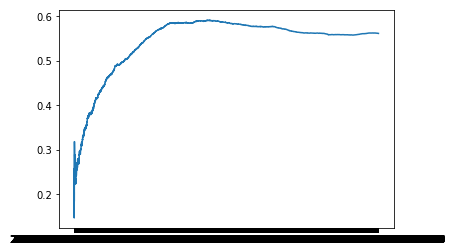

In [19]:
plt.figure()
plt.plot(answersTable.loc[answersTable[" OwnerUserId"]==user][" CreationDate"].tolist(),answersTable.loc[answersTable[" OwnerUserId"]==user]["UpMetric"].tolist())
plt.show()

In [27]:
#Normalization: 0 should correspond to time of first activity and 1 to present date. 
#1 converting creation date to proper time format

questionsTable = pd.read_table("r_questions.csv", sep=",")
questionsTable=questionsTable.sort_values([' OwnerUserId',' CreationDate'])

answersTable[' CreationDate']=pd.to_datetime(answersTable[' CreationDate'])
questionsTable[' CreationDate']=pd.to_datetime(questionsTable[' CreationDate'])



/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
questionsTable

,Id,OwnerUserId,CreationDate,LastActivityDate,Score,AcceptedAnswerId,AnswerCount,CommentCount,ViewCount,FavoriteCount,Unnamed: 10
1,79709,0,2008-09-17 03:39:16.913,2016-04-28T13:21:33.607,5,0,7,2,830,3,NaN
3,102056,0,2008-09-19 14:03:25.997,2014-07-10T18:16:29.313,121,0,21,2,11060,53,NaN
4,103312,0,2008-09-19 16:09:26.053,2015-04-23T05:16:26.967,5,0,2,0,3402,0,NaN
28,713878,0,2009-04-03 13:23:03.610,2014-06-11T06:55:38.080,27,0,7,2,23014,12,NaN
60,1166157,0,2009-07-22 15:36:30.007,2009-07-22T16:16:31.767,0,0,1,1,980,1,NaN
64,1169292,0,2009-07-23 02:35:28.683,2009-07-23T05:01:34.753,8,0,3,0,3132,2,NaN
108,1262911,0,2009-08-11 21:04:53.483,2015-12-17T05:52:23.427,2,0,2,1,439,1,NaN
134,1343442,0,2009-08-27 19:55:04.677,2016-02-16T11:40:47.727,8,0,5,0,1196,2,NaN
160,1395118,0,2009-09-08 17:07:55.250,2016-03-04T10:37:55.173,1,0,1,0,304,0,NaN
168,1395189,0,2009-09-08 17:21:50.620,2016-03-04T10:29:37.517,6,0,3,0,957,1,NaN


In [81]:
#2 create relativeTime
#2.1 identify the first activity of users
answersTable["FirstActivity"]=~answersTable[" OwnerUserId"].duplicated()
questionsTable["FirstActivity"]=~questionsTable[" OwnerUserId"].duplicated()

firstAnswers=answersTable.loc[answersTable["FirstActivity"]==True][[" OwnerUserId"," CreationDate"]]
firstQuestions = questionsTable.loc[questionsTable["FirstActivity"]==True][[" OwnerUserId"," CreationDate"]]

In [82]:
questionsTable

,Id,OwnerUserId,CreationDate,LastActivityDate,Score,AcceptedAnswerId,AnswerCount,CommentCount,ViewCount,FavoriteCount,Unnamed: 10,FirstActivity
1,79709,0,2008-09-17 03:39:16.913,2016-04-28T13:21:33.607,5,0,7,2,830,3,NaN,True
3,102056,0,2008-09-19 14:03:25.997,2014-07-10T18:16:29.313,121,0,21,2,11060,53,NaN,False
4,103312,0,2008-09-19 16:09:26.053,2015-04-23T05:16:26.967,5,0,2,0,3402,0,NaN,False
28,713878,0,2009-04-03 13:23:03.610,2014-06-11T06:55:38.080,27,0,7,2,23014,12,NaN,False
60,1166157,0,2009-07-22 15:36:30.007,2009-07-22T16:16:31.767,0,0,1,1,980,1,NaN,False
64,1169292,0,2009-07-23 02:35:28.683,2009-07-23T05:01:34.753,8,0,3,0,3132,2,NaN,False
108,1262911,0,2009-08-11 21:04:53.483,2015-12-17T05:52:23.427,2,0,2,1,439,1,NaN,False
134,1343442,0,2009-08-27 19:55:04.677,2016-02-16T11:40:47.727,8,0,5,0,1196,2,NaN,False
160,1395118,0,2009-09-08 17:07:55.250,2016-03-04T10:37:55.173,1,0,1,0,304,0,NaN,False
168,1395189,0,2009-09-08 17:21:50.620,2016-03-04T10:29:37.517,6,0,3,0,957,1,NaN,False


In [83]:
firstActTable=firstQuestions.merge(firstAnswers, left_on=" OwnerUserId", right_on=" OwnerUserId", how='outer')
firstActTable.columns = [" OwnerUserId","FirstQuestion","FirstAnswer"]

In [78]:
firstActTable["FirstActivity"]=firstActTable[["FirstQuestion","FirstAnswer"]].min(axis=1)

In [79]:
firstActTable #confirmed that is correct for userId 277 and 280

,OwnerUserId,FirstQuestion,FirstAnswer,FirstActivity
0,0,2008-09-17 03:39:16.913,2008-09-17T03:51:30.190,NaN
1,277,2008-09-24 13:31:07.500,2011-01-18T17:53:30.627,NaN
2,280,2009-12-11 01:18:47.903,NaN,NaN
3,337,2014-10-16 17:33:39.987,2014-08-19T19:58:00.707,NaN
4,357,2016-03-04 15:00:16.023,NaN,NaN
5,404,2010-01-23 00:30:05.610,NaN,NaN
6,422,2009-05-18 08:16:10.573,NaN,NaN
7,445,2009-01-31 14:50:28.677,2009-02-04T15:12:59.503,NaN
8,572,2009-01-07 13:27:28.407,NaN,NaN
9,681,2012-04-06 21:21:34.377,2012-10-01T22:57:01.570,NaN


In [41]:
#Adding first activity table to answerstable 
summaryTableAnswer = answersTable[["Id"," OwnerUserId"," CreationDate"," ParentId","UpMetric"]]
summaryTableAnswer=summaryTableAnswer.merge(firstActTable,left_on = " OwnerUserId",right_on=" OwnerUserId")

In [42]:
#Use first activity to obtain normalized time
summaryTableAnswer["Present"]= max(summaryTableProbAccAnswer[" CreationDate"])
summaryTableAnswer["DifferenceNumerator"]=(summaryTableAnswer[" CreationDate"]-summaryTableAnswer["FirstActivity"])
summaryTableAnswer["DifferenceDenominator"]=(summaryTableAnswer["Present"]-summaryTableAnswer["FirstActivity"])

In [43]:
summaryTableAnswer.DifferenceNumerator=summaryTableAnswer.DifferenceNumerator.dt.total_seconds() /(24*3600)
summaryTableAnswer.DifferenceDenominator=summaryTableAnswer.DifferenceDenominator.dt.total_seconds()/(24*3600)
summaryTableAnswer["NormTime"]=summaryTableAnswer["DifferenceNumerator"]/summaryTableAnswer["DifferenceDenominator"]

In [44]:
summaryTableAnswer

,Id,OwnerUserId,CreationDate,ParentId,UpMetric,FirstQuestion,FirstAnswer,FirstActivity,Present,DifferenceNumerator,DifferenceDenominator,NormTime
0,79788,0,2008-09-17 03:51:30.190,79709,0.173913,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,0.008487,3462.026488,0.000002
1,86804,0,2008-09-17 19:39:37.370,79709,0.108696,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,0.666903,3462.026488,0.000193
2,476928,0,2009-01-25 00:05:19.107,476726,0.298654,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,129.851414,3462.026488,0.037507
3,501926,0,2009-02-02 00:42:27.250,501917,0.312226,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,137.877203,3462.026488,0.039826
4,612573,0,2009-03-04 21:41:41.980,596819,0.329781,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,168.751679,3462.026488,0.048744
5,750852,0,2009-04-15 08:58:03.103,750786,0.273813,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,210.221368,3462.026488,0.060722
6,823251,0,2009-05-05 03:50:25.733,750786,0.241582,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,230.007741,3462.026488,0.066437
7,876778,0,2009-05-18 08:56:02.270,876711,0.220643,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,243.219969,3462.026488,0.070254
8,969680,0,2009-06-09 12:03:40.747,750786,0.272433,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,265.350276,3462.026488,0.076646
9,1116218,0,2009-07-12 15:18:02.497,1114699,0.264237,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913,2018-03-11 04:17:25.483,298.485250,3462.026488,0.086217


In [45]:
#Remove users who have less than 5 answers
nrQuestionsperUser = answersTable[" OwnerUserId"].value_counts()

lessthan5users=nrQuestionsperUser[nrQuestionsperUser<5].index
nrUsersBefore=len(list(set(summaryTableProbAccAnswer[" OwnerUserId"].tolist())))
summaryTableProbAccAnswer=summaryTableProbAccAnswer.loc[~summaryTableProbAccAnswer[" OwnerUserId"].isin(lessthan5users)]
nrUsersAfter=len(list(set(summaryTableProbAccAnswer[" OwnerUserId"].tolist())))
print(1-nrUsersAfter/nrUsersBefore,"% of the users were removed.")

0.8437442133201654 % of the users were removed.


In [46]:
#Add 0 to time 0 and prolong score to 1
usersWhoHaveZero=list(set(summaryTableProbAccAnswer[" OwnerUserId"][summaryTableProbAccAnswer["NormTime"]==0].tolist())) # around 3000
usersArtificialZero = list(set(summaryTableProbAccAnswer[" OwnerUserId"][~summaryTableProbAccAnswer[" OwnerUserId"].isin(usersWhoHaveZero)].tolist()))
tempdfArtificialZero = pd.DataFrame(0, index=np.arange(len(usersArtificialZero)), columns=list(summaryTableProbAccAnswer.columns.values))
tempdfArtificialZero[" OwnerUserId"]=usersArtificialZero
tempdfArtificialZero[" OwnerUserId"]=tempdfArtificialZero[" OwnerUserId"].astype(np.int64)
summaryTableProbAccAnswer = summaryTableProbAccAnswer.append(tempdfArtificialZero, ignore_index=True)

#reorder again
summaryTableProbAccAnswer=summaryTableProbAccAnswer.sort_values([' OwnerUserId','NormTime']) #order by user
summaryTableProbAccAnswer

,Id,OwnerUserId,CreationDate,ParentId,UpMetric,FirstQuestion,FirstAnswer,FirstActivity,Present,DifferenceNumerator,DifferenceDenominator,NormTime
252282,0,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,0.000000
0,79788,0,2008-09-17 03:51:30.190000,79709,0.173913,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,0.008487,3462.026488,0.000002
1,86804,0,2008-09-17 19:39:37.370000,79709,0.108696,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,0.666903,3462.026488,0.000193
2,476928,0,2009-01-25 00:05:19.107000,476726,0.298654,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,129.851414,3462.026488,0.037507
3,501926,0,2009-02-02 00:42:27.250000,501917,0.312226,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,137.877203,3462.026488,0.039826
4,612573,0,2009-03-04 21:41:41.980000,596819,0.329781,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,168.751679,3462.026488,0.048744
5,750852,0,2009-04-15 08:58:03.103000,750786,0.273813,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,210.221368,3462.026488,0.060722
6,823251,0,2009-05-05 03:50:25.733000,750786,0.241582,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,230.007741,3462.026488,0.066437
7,876778,0,2009-05-18 08:56:02.270000,876711,0.220643,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,243.219969,3462.026488,0.070254
8,969680,0,2009-06-09 12:03:40.747000,750786,0.272433,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-03-11 04:17:25.483000,265.350276,3462.026488,0.076646


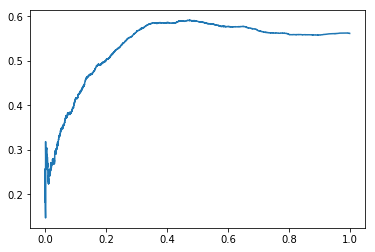

In [48]:
#Example - shape should be the same but with different x axis, between 0 and 1
user = 3732271
plt.figure()
plt.plot(summaryTableProbAccAnswer.loc[summaryTableProbAccAnswer[" OwnerUserId"]==user]["NormTime"].tolist(),summaryTableProbAccAnswer.loc[summaryTableProbAccAnswer[" OwnerUserId"]==user]["UpMetric"].tolist())
plt.show()

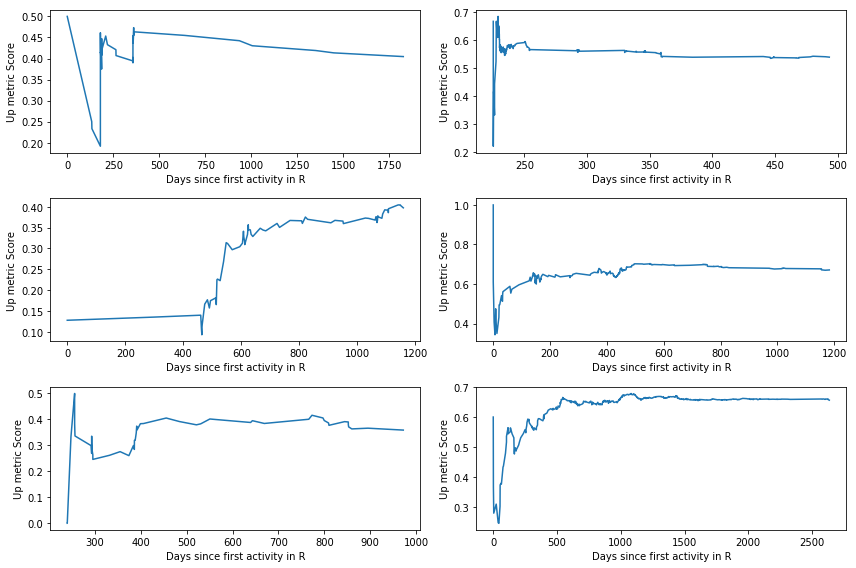

In [50]:
import random
r_users=summaryTableAnswer.loc[np.random.choice(summaryTableAnswer.index, 6)][" OwnerUserId"].tolist()
plt.figure(figsize=(12,8))

for i in range(0,6):
    user=r_users[i]
    plt.subplot(3,2,i+1)
    plt.xlabel("Days since first activity in R")
    plt.ylabel("Up metric Score")
    plt.plot(summaryTableAnswer.loc[summaryTableAnswer[" OwnerUserId"]==user]["DifferenceNumerator"].tolist(),summaryTableAnswer.loc[summaryTableAnswer[" OwnerUserId"]==user]["UpMetric"].tolist())
    plt.tight_layout()

plt.show()